In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import functions.handy_functions as hf
import functions.parse_data as parse

from sklearn.decomposition import PCA

In [46]:

data_clear=parse.parse('cloudrm_clear.dat')
data_ice=parse.parse('cloudrm_ice.dat')
data_mixed=parse.parse('cloudrm_mixed.dat')
data_water=parse.parse('cloudrm_water.dat')

data_all=pd.concat([data_water,data_mixed,data_ice])
data_all=data_all.drop(columns=['Cloud_B01','Clear_B01'])

data_all=hf.dumb_down_surface(data_all) #Create simpler labels for surface descriptio 

In [47]:
data_all.Surface_Desc.value_counts()

Surface_Desc
vegetation-tree-quercus        16343
vegetation-tree-pinus           7369
vegetation-shrub-baccharis      6976
vegetation-shrub-ceanothus      6948
vegetation-shrub-calocedrus     3641
                               ...  
soil-inceptisol-xerumbrept       176
vegetation-tree-caesalpina       168
vegetation-tree-phytolacca       168
vegetation-shrub-gasteria        164
soil-mollisol-paleustoll         157
Name: count, Length: 139, dtype: int64

In [48]:
data_all.Surface_Desc_Dumb.value_counts()

Surface_Desc_Dumb
vegetation                     105806
rock                            15882
nonphotosyntheticvegetation     11704
water                            8597
soil                             8011
Name: count, dtype: int64

In [49]:
data_all.columns

Index(['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05', 'Cloud_B06',
       'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10', 'Cloud_B11',
       'Cloud_B12', 'Cloud_B13', 'Clear_B02', 'Clear_B03', 'Clear_B04',
       'Clear_B05', 'Clear_B06', 'Clear_B07', 'Clear_B08', 'Clear_B09',
       'Clear_B10', 'Clear_B11', 'Clear_B12', 'Clear_B13', 'Sat_Zenith_Angle',
       'Sun_Zenith_Angle', 'Azimuth_Diff_Angle', 'COT', 'Cloud_Type',
       'Profile_ID', 'GOT', 'Water_Vapor', 'Surface_Desc',
       'Surface_Desc_Dumb'],
      dtype='object')

(array([ 3029.,  1144.,  2309.,  1947.,  2760.,  5944.,  8129., 11888.,
        26561., 86289.]),
 array([0.04146 , 0.135185, 0.22891 , 0.322635, 0.41636 , 0.510085,
        0.60381 , 0.697535, 0.79126 , 0.884985, 0.97871 ]),
 <BarContainer object of 10 artists>)

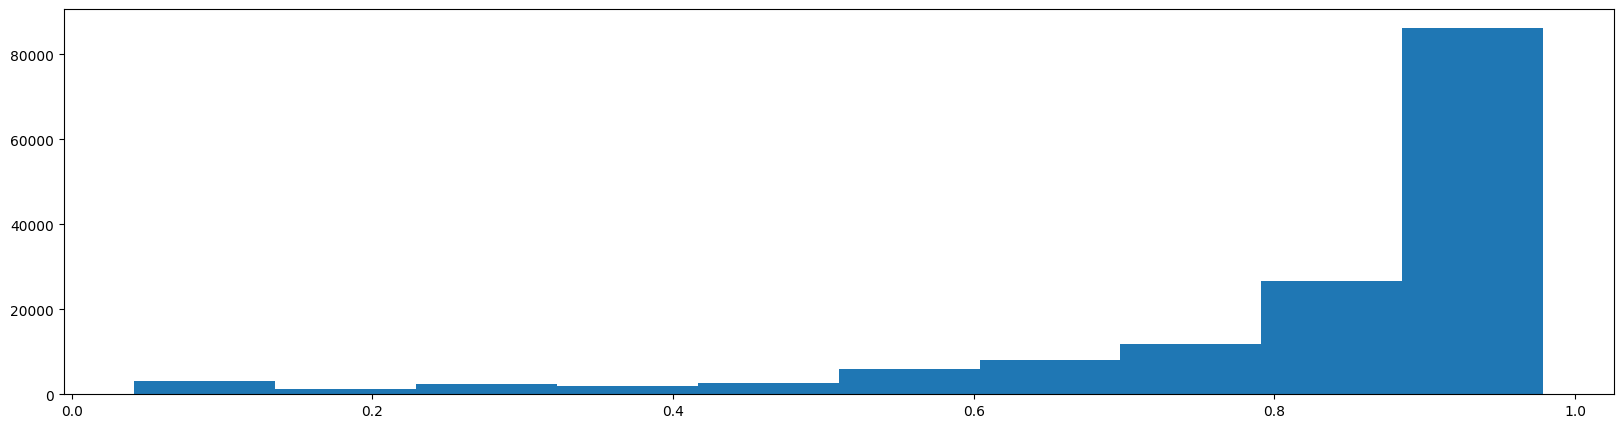

In [50]:
plt.hist(data_all['Clear_B12'])

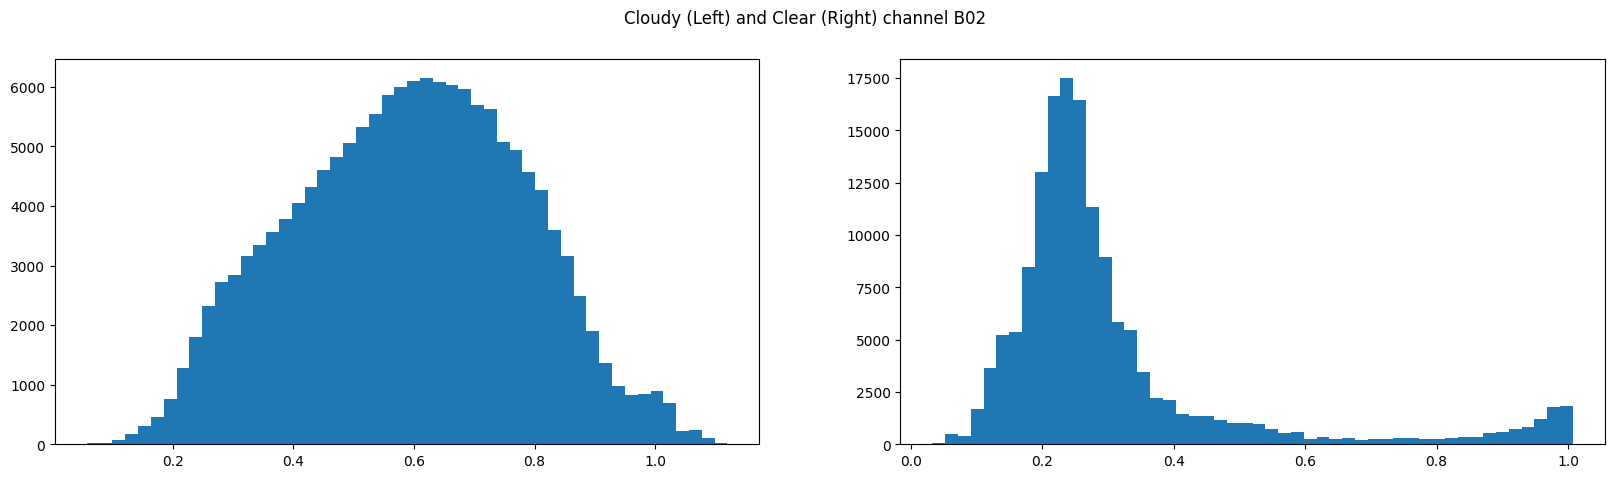

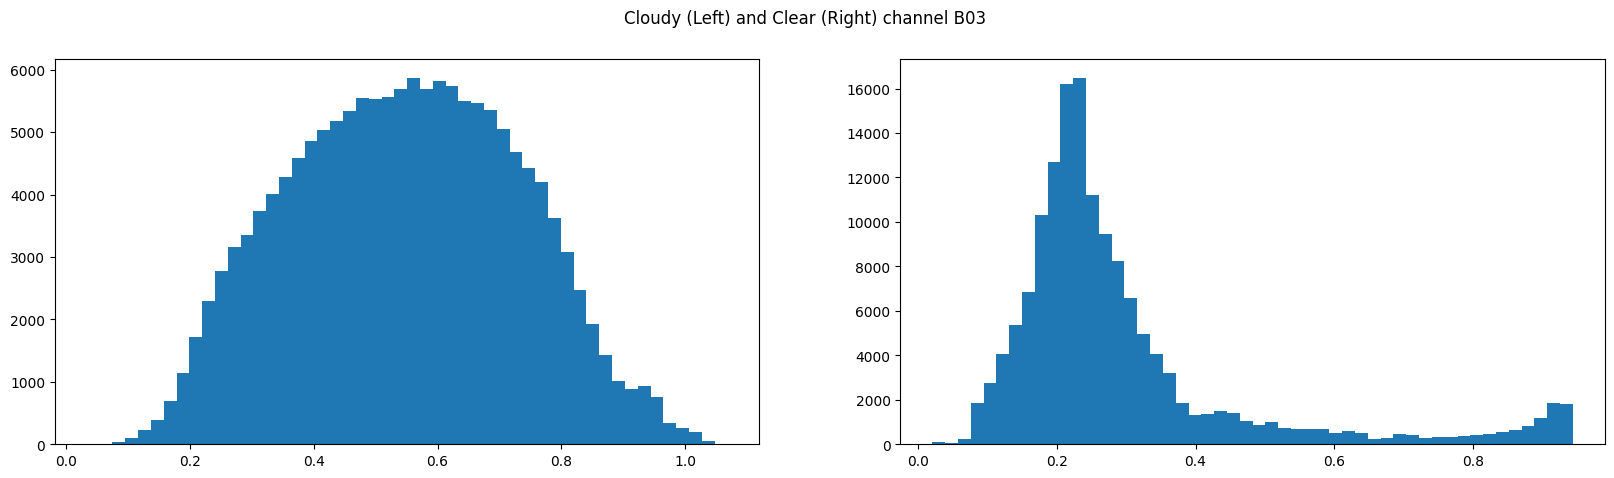

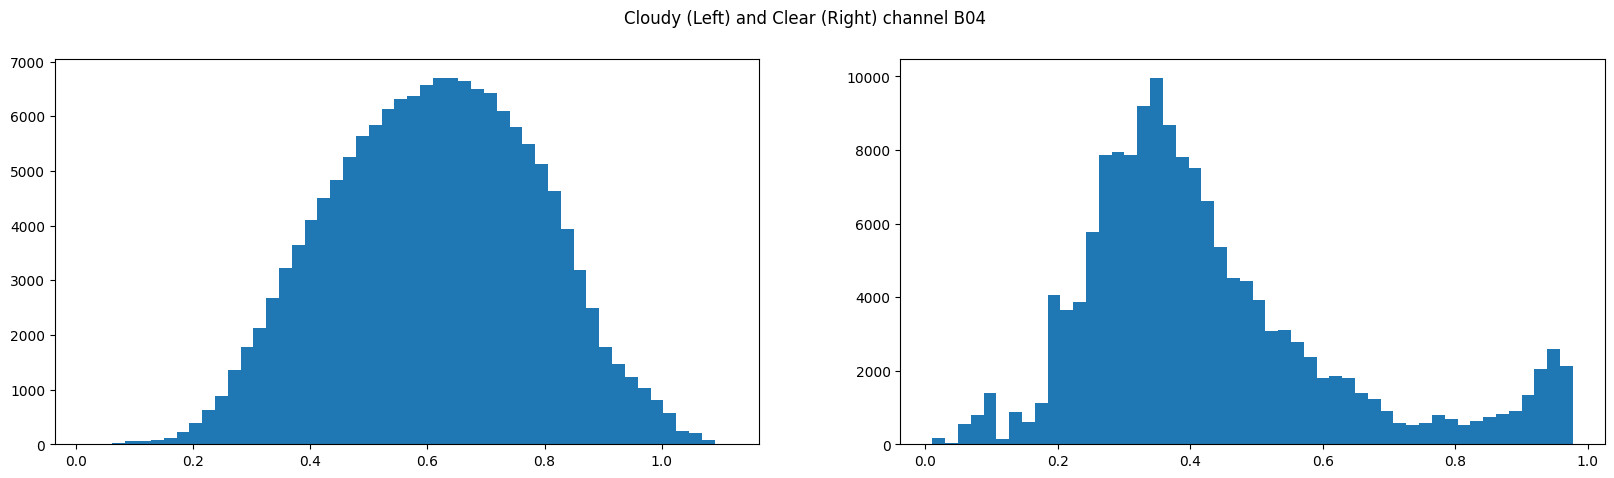

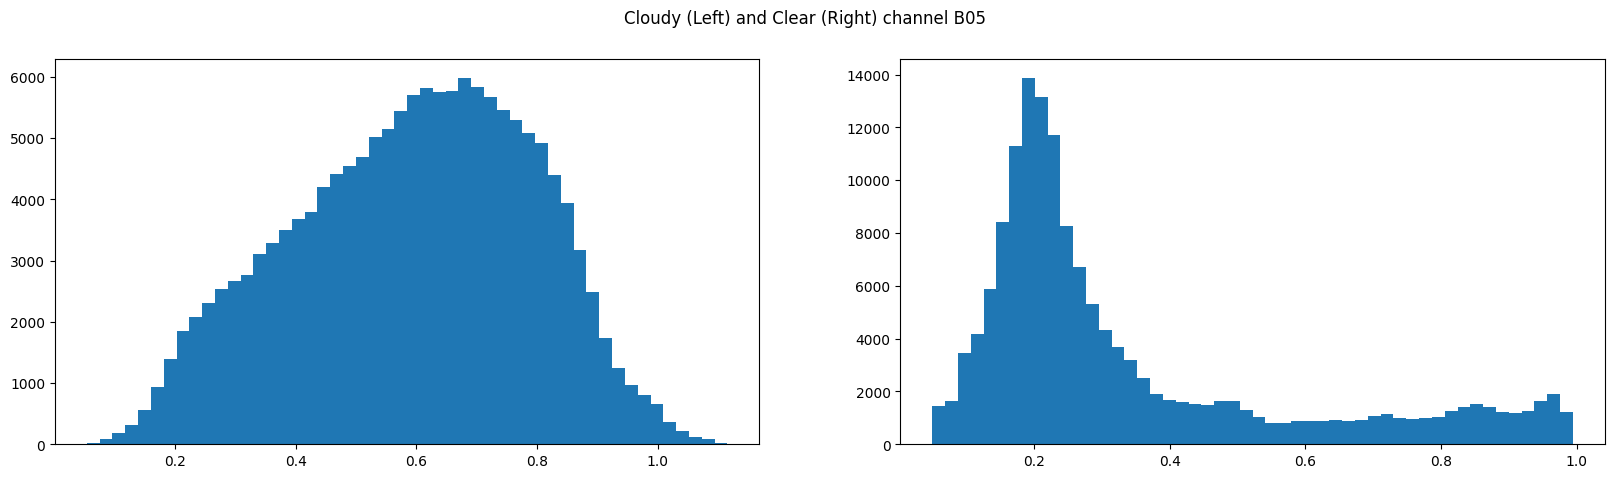

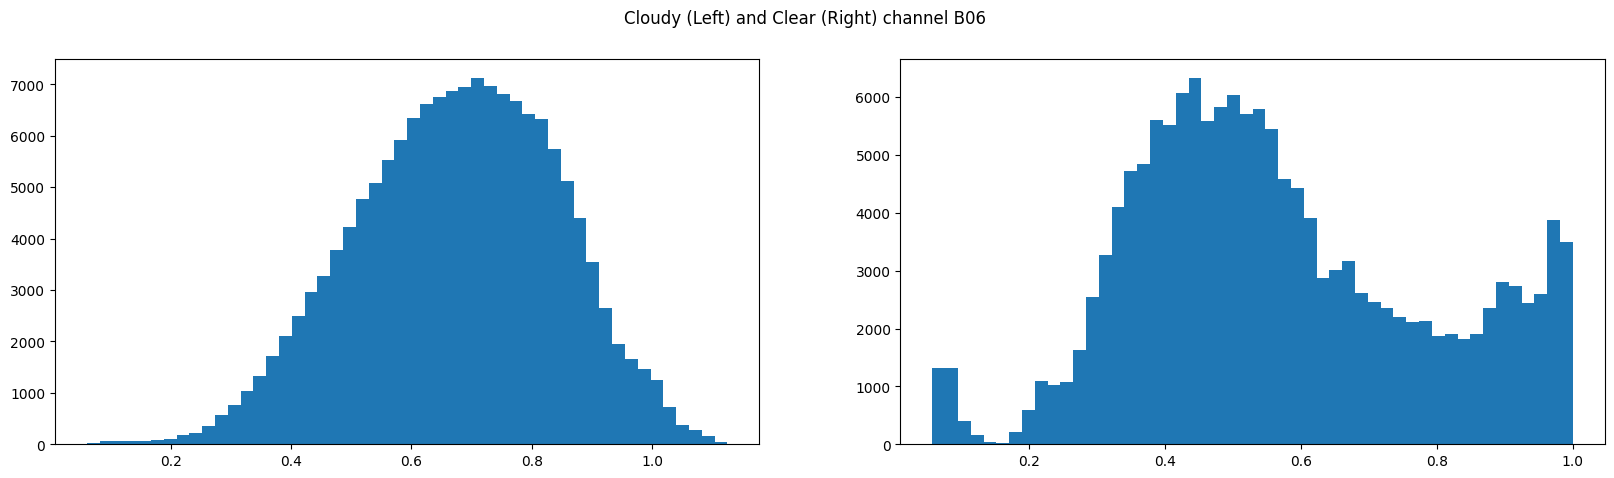

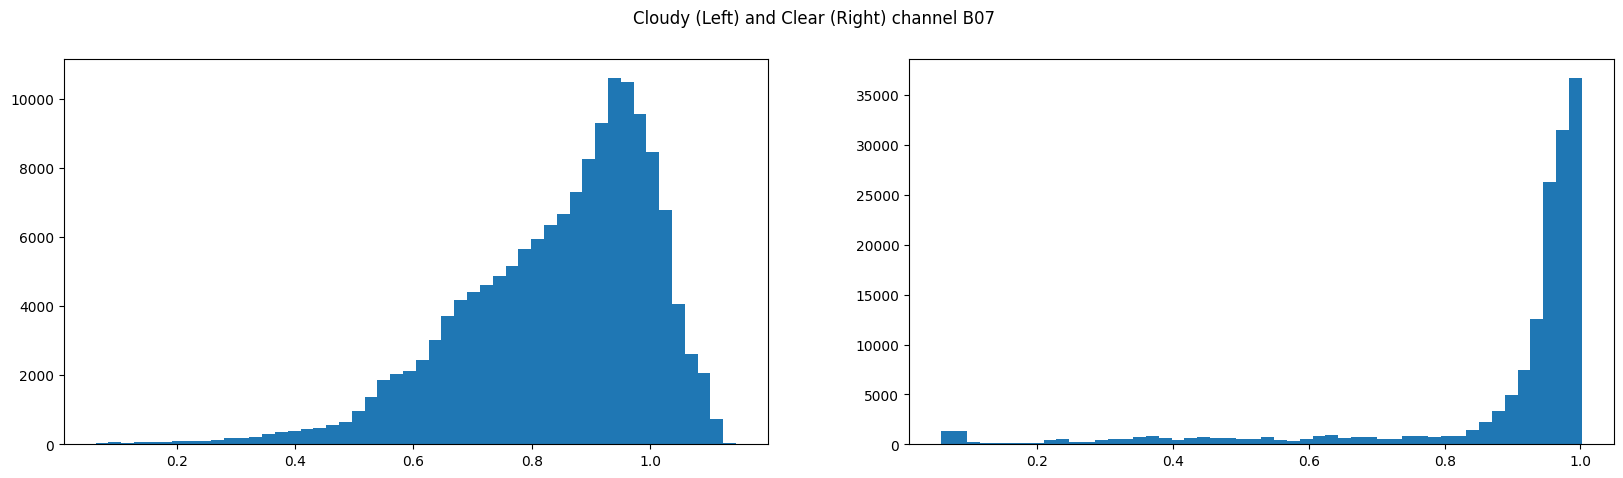

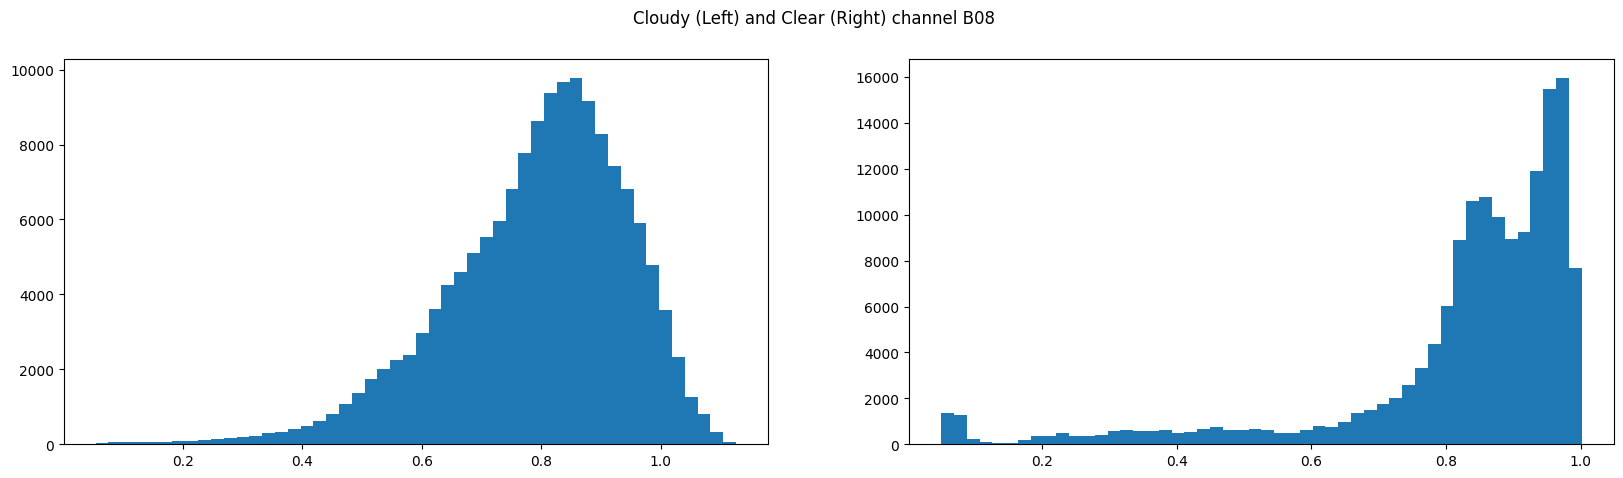

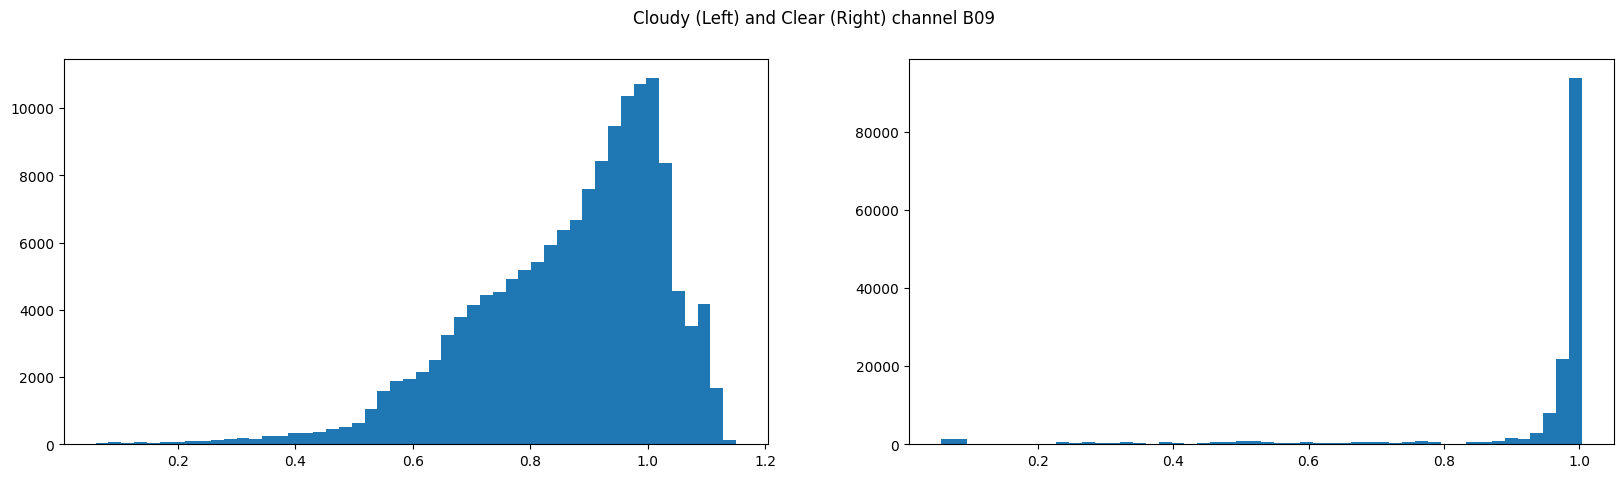

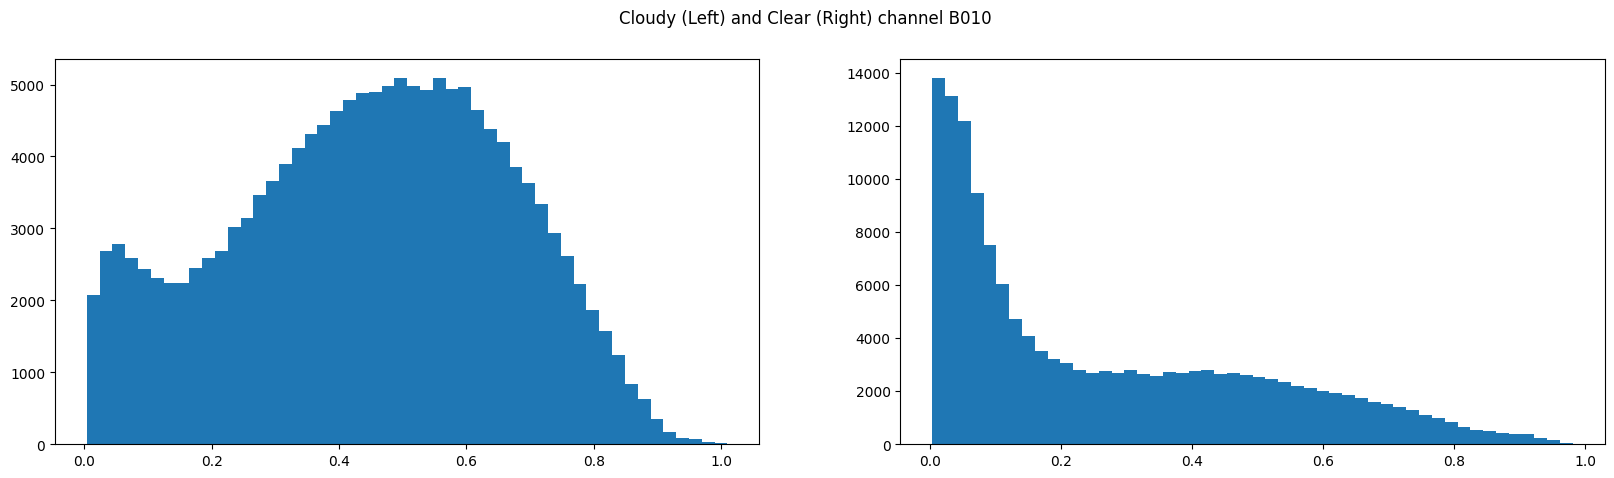

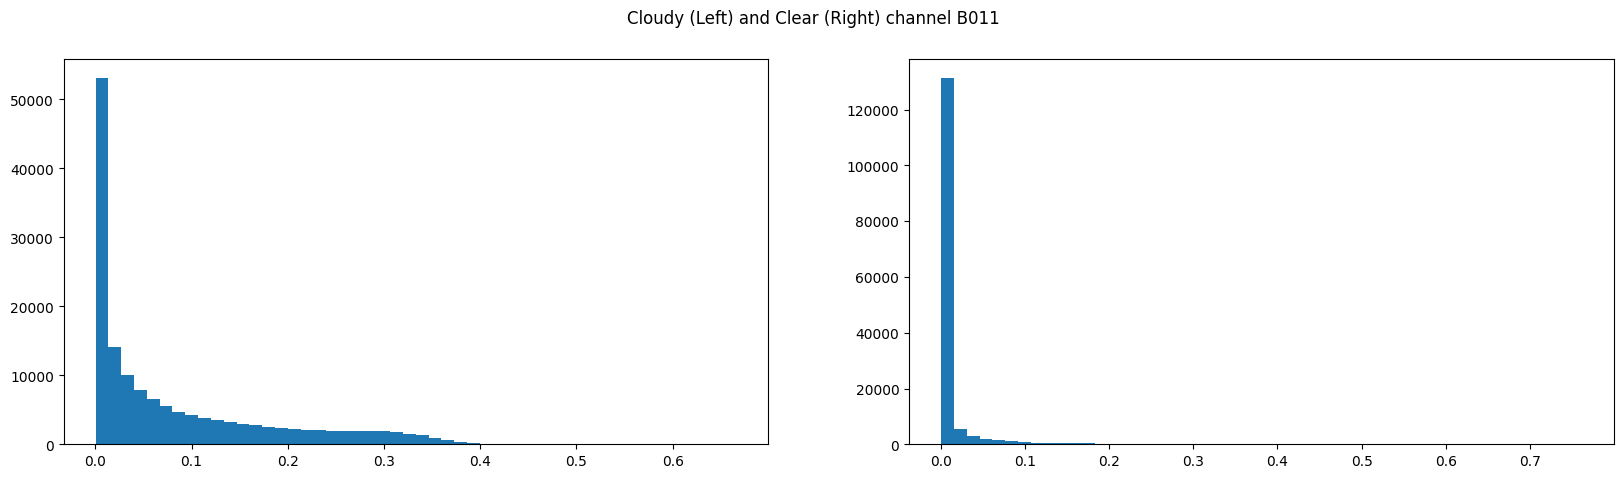

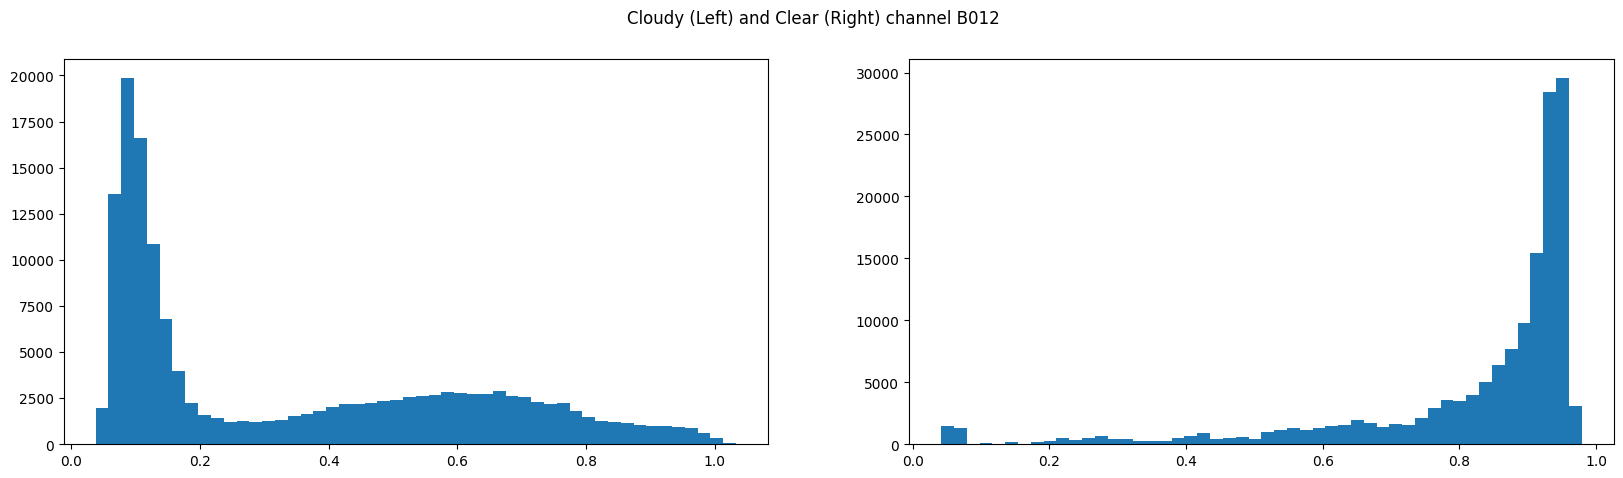

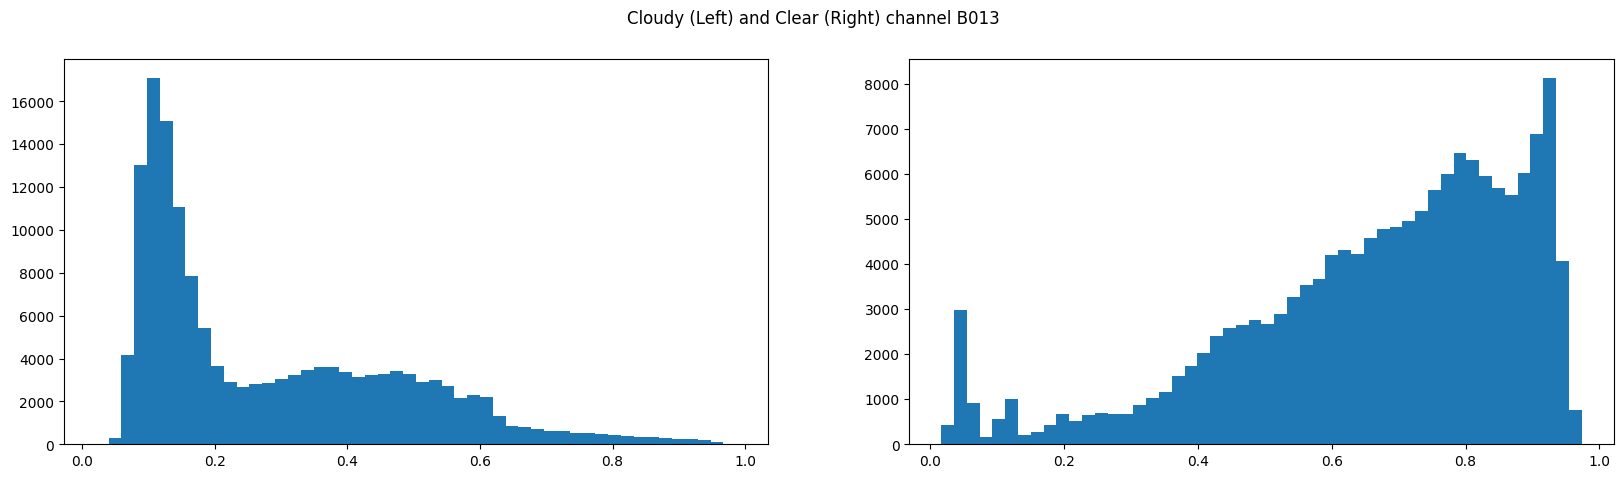

In [23]:
for i in range(2,14):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle("Cloudy (Left) and Clear (Right) channel B0"+str(i))
    if i<=9:
        ax1.hist(data_all['Cloud_'+'B0'+str(i)],bins=50)
        ax2.hist(data_all['Clear_'+'B0'+str(i)],bins=50)
    else:
        ax1.hist(data_all['Cloud_'+'B'+str(i)],bins=50)
        ax2.hist(data_all['Clear_'+'B'+str(i)],bins=50)

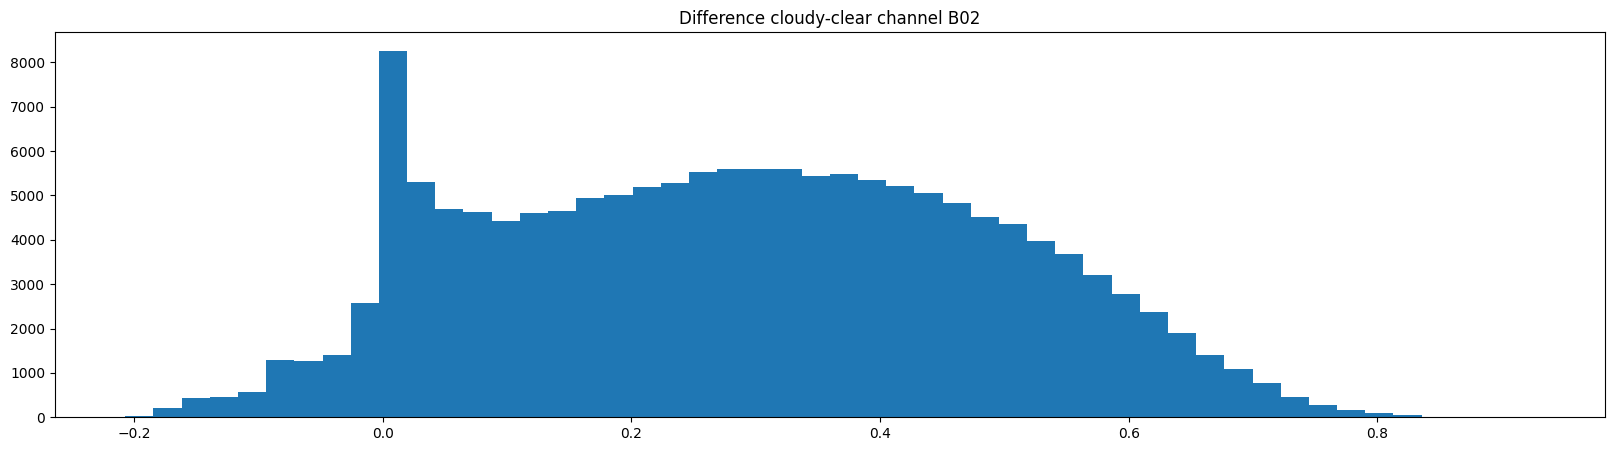

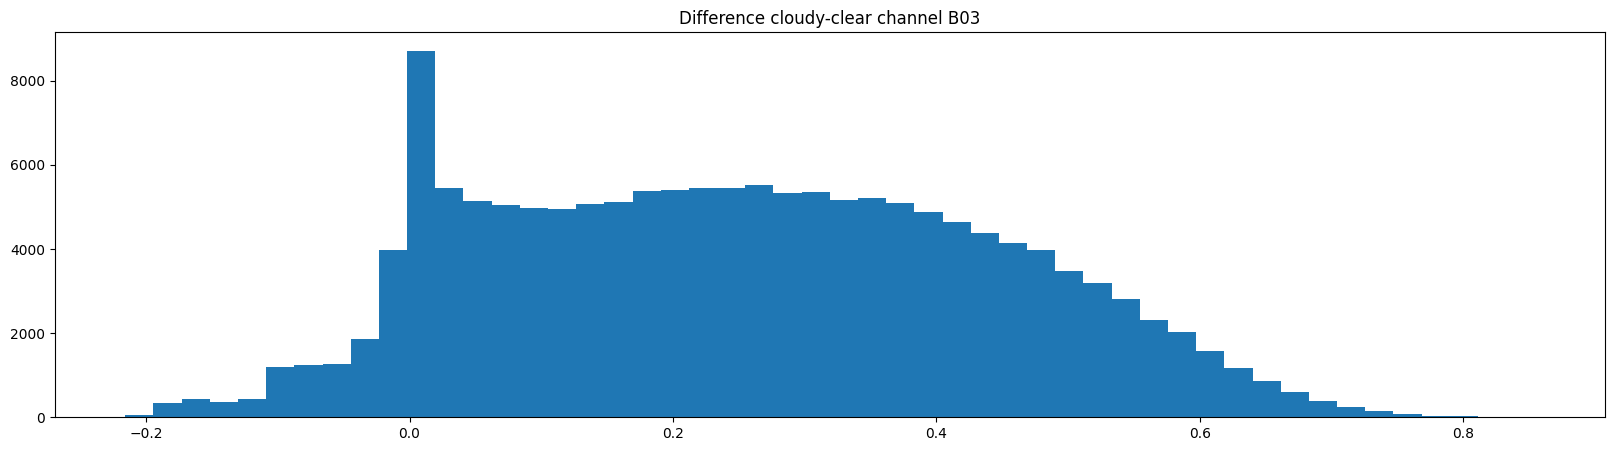

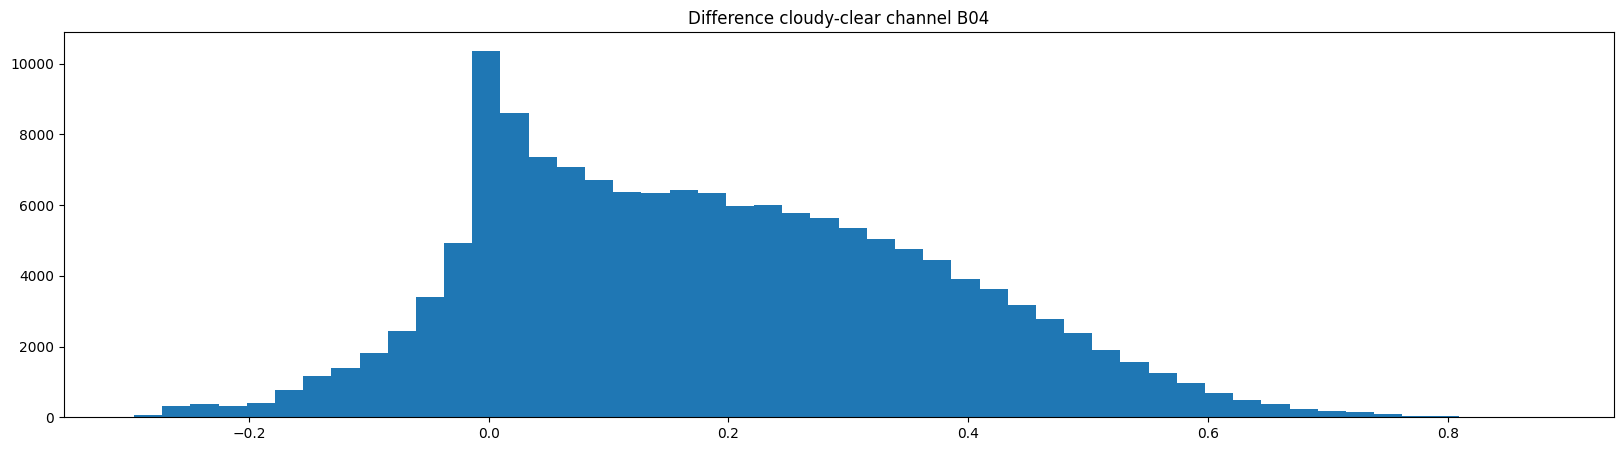

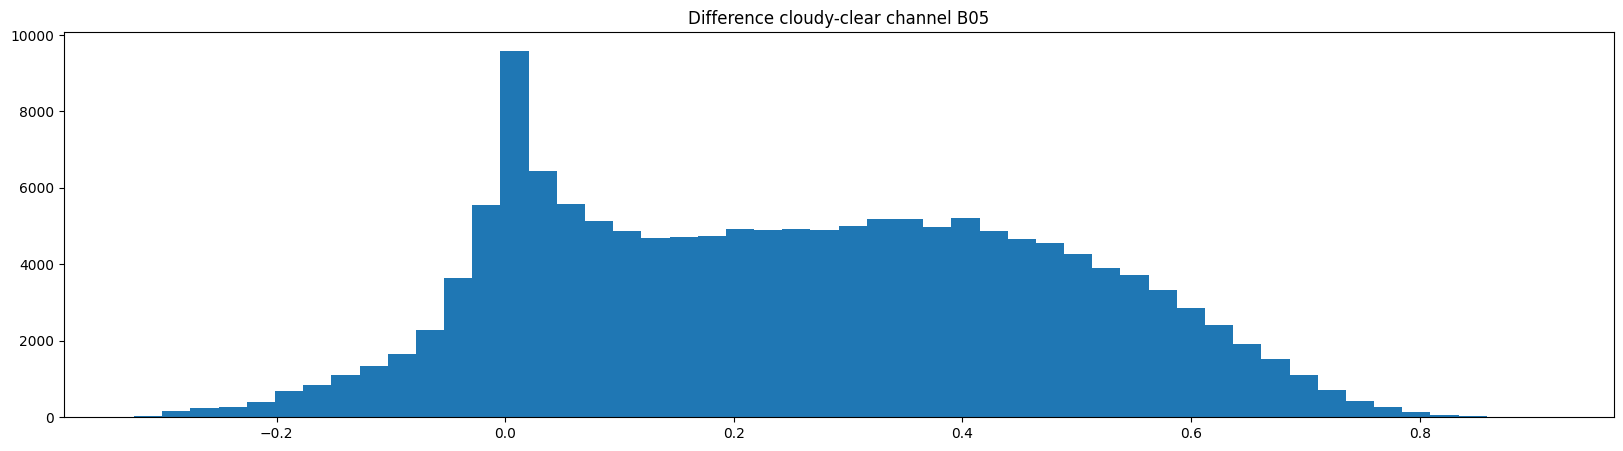

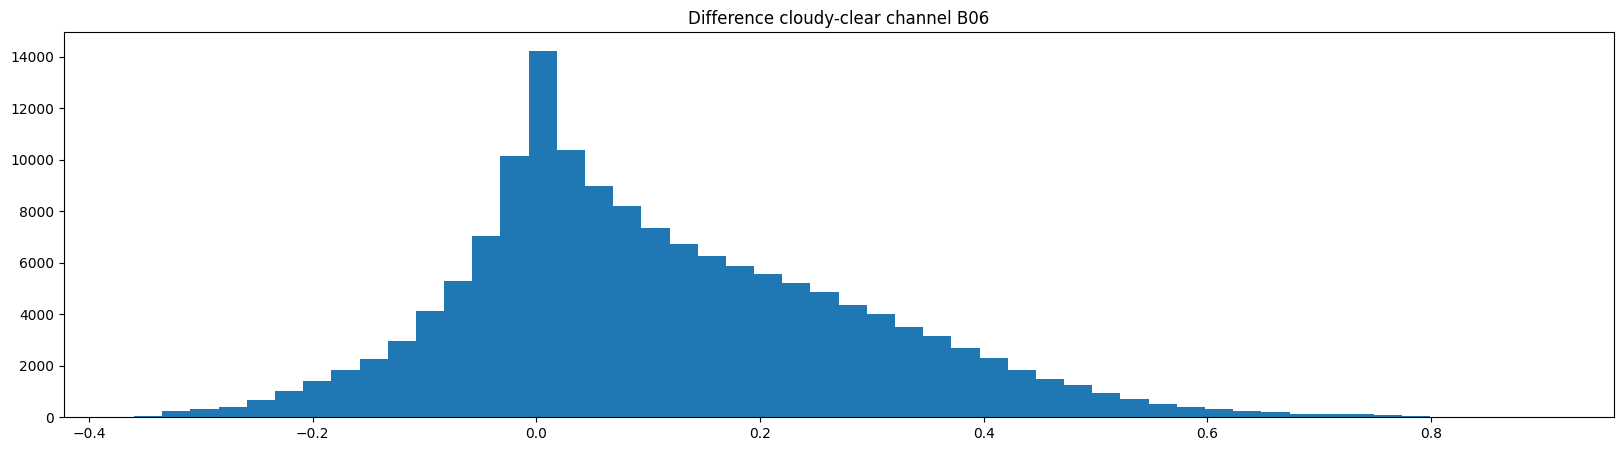

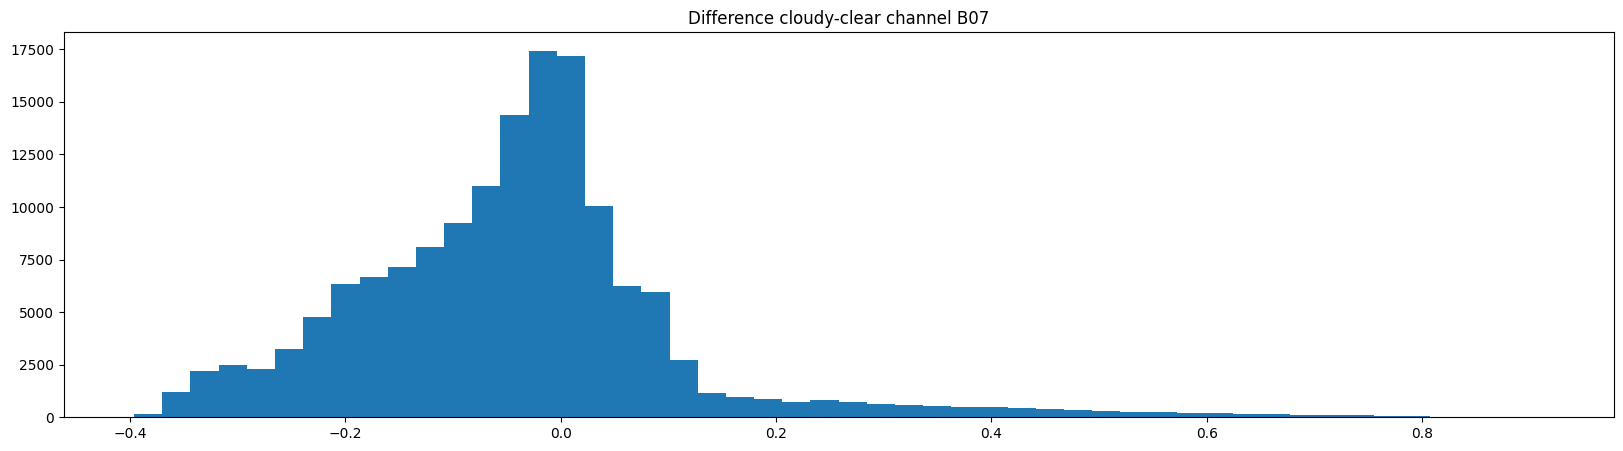

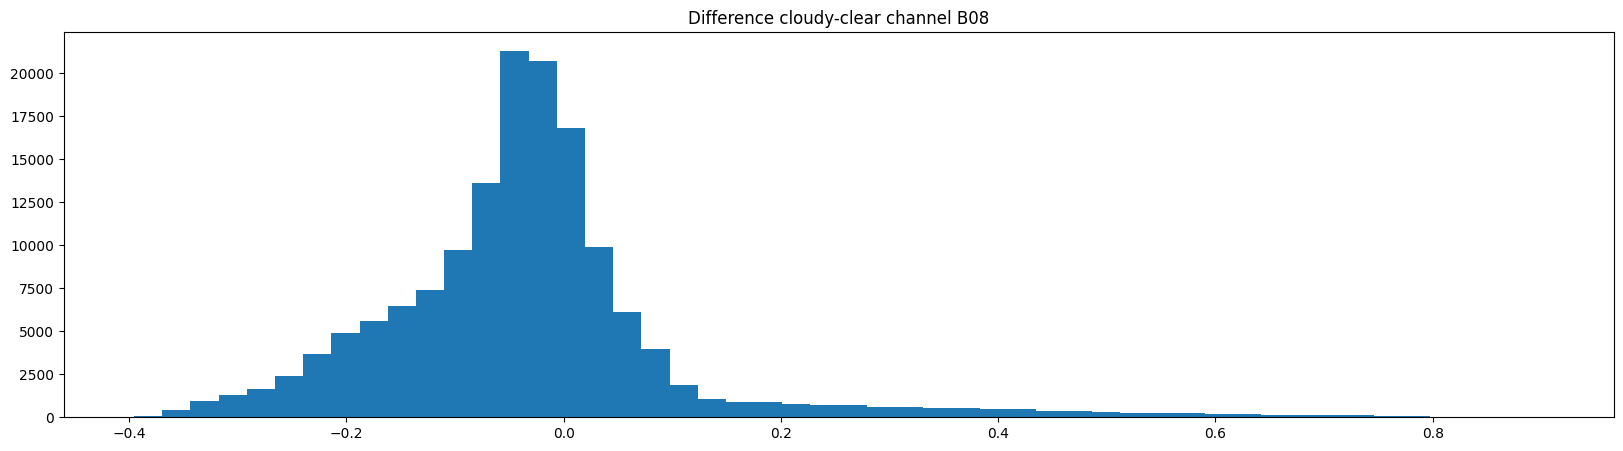

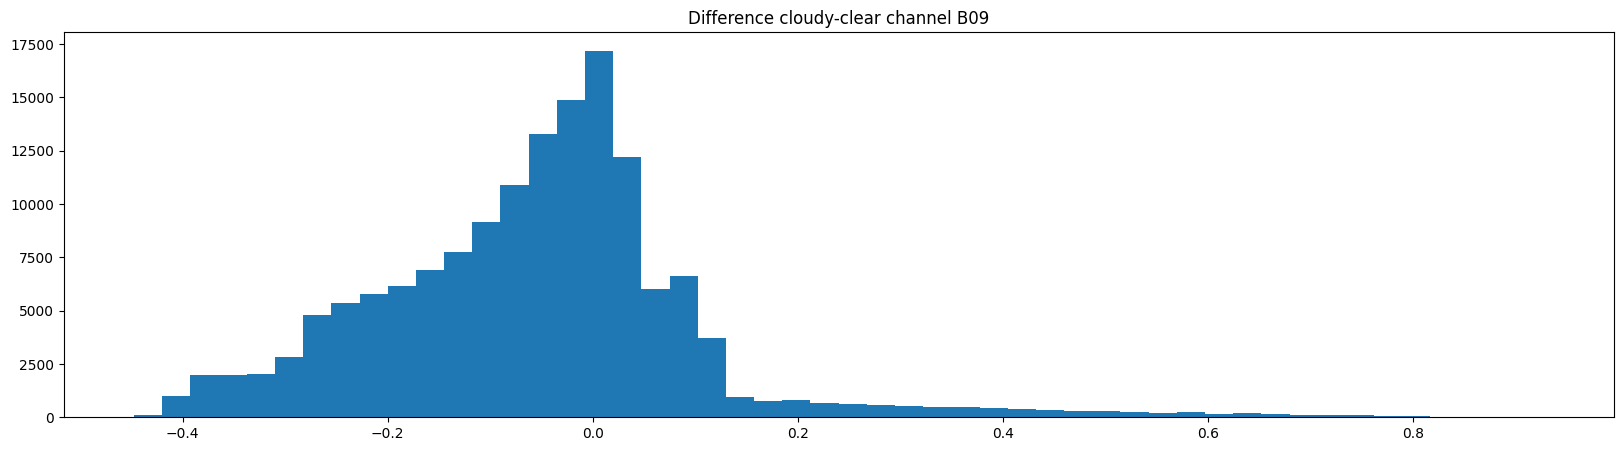

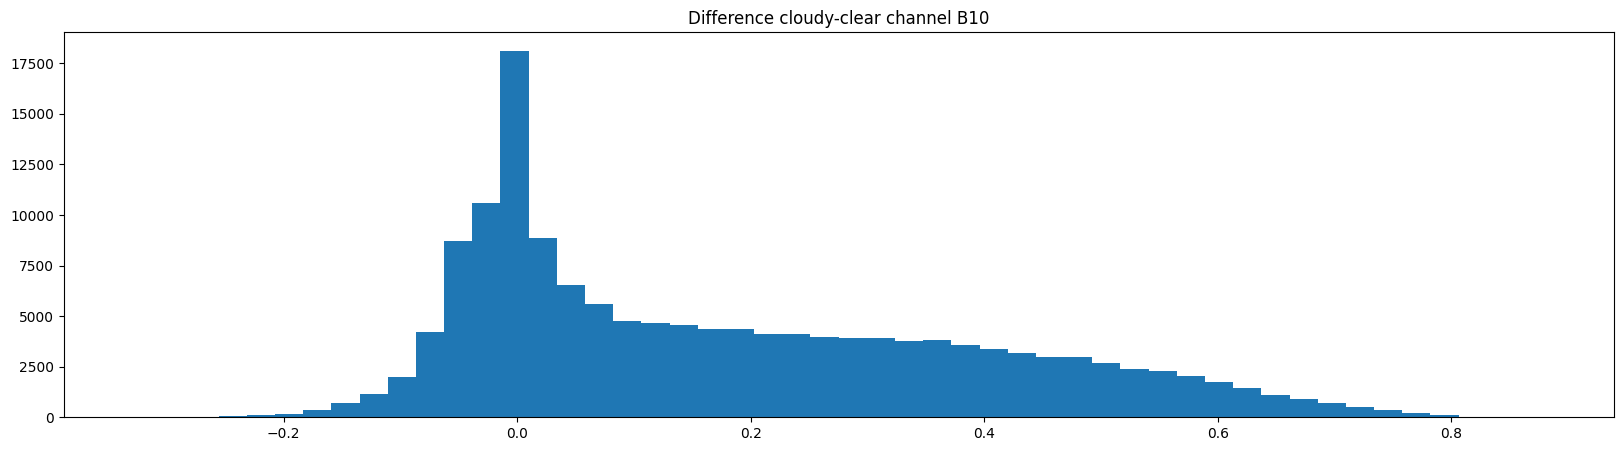

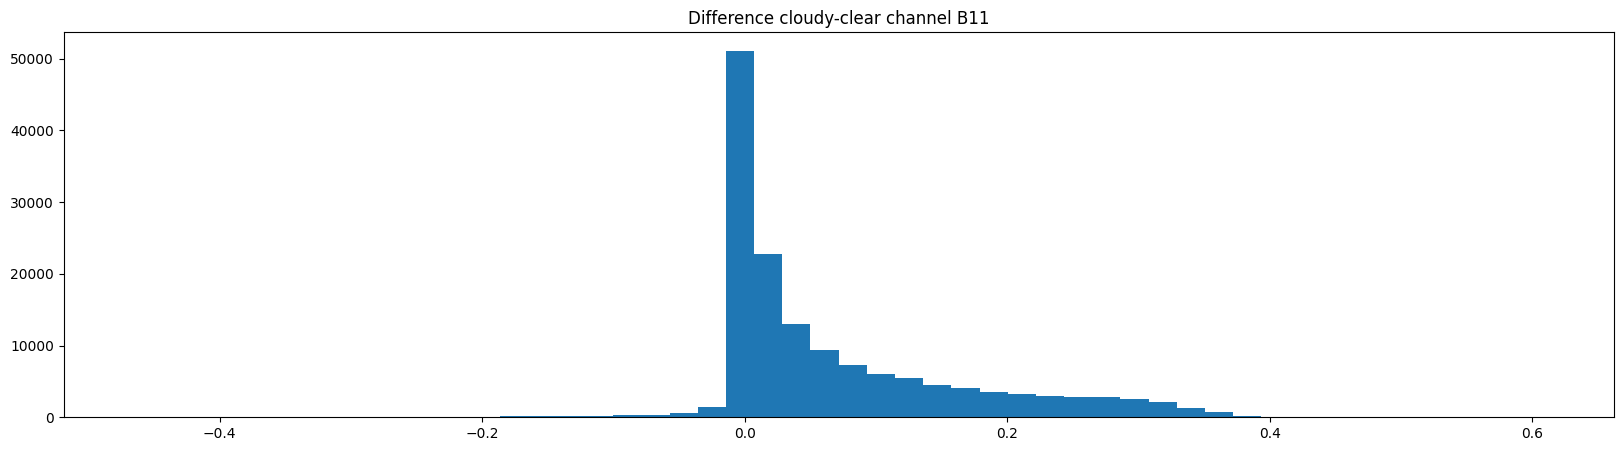

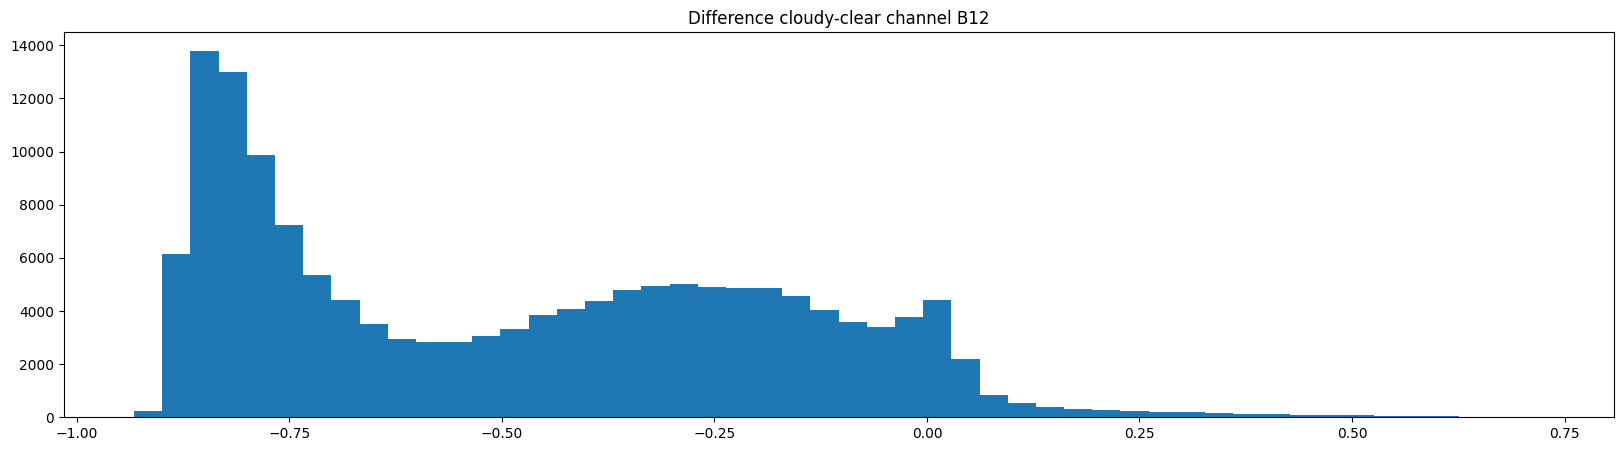

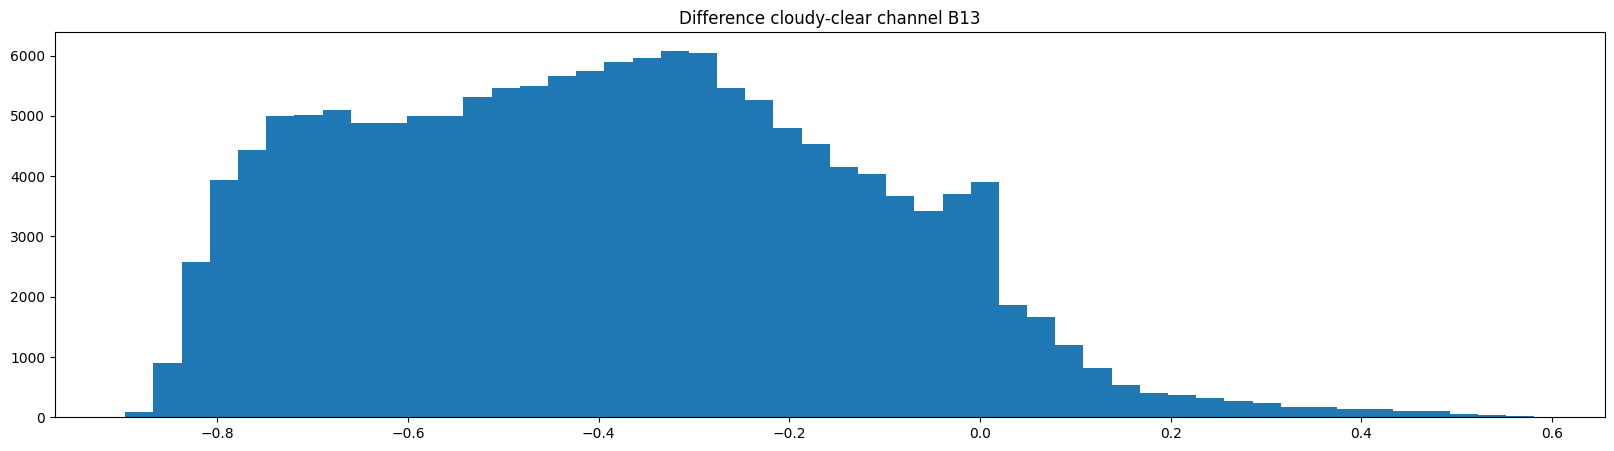

In [24]:
for i in range(2,14):
    
    if i<=9:
        plt.hist(data_all['Cloud_'+'B0'+str(i)]-data_all['Clear_'+'B0'+str(i)],bins=50)
        plt.title("Difference cloudy-clear channel B0"+str(i))
        plt.show()
    else:
        plt.hist(data_all['Cloud_'+'B'+str(i)]-data_all['Clear_'+'B'+str(i)],bins=50)
        plt.title("Difference cloudy-clear channel B"+str(i))
        plt.show()

## Histograms divided by surface description

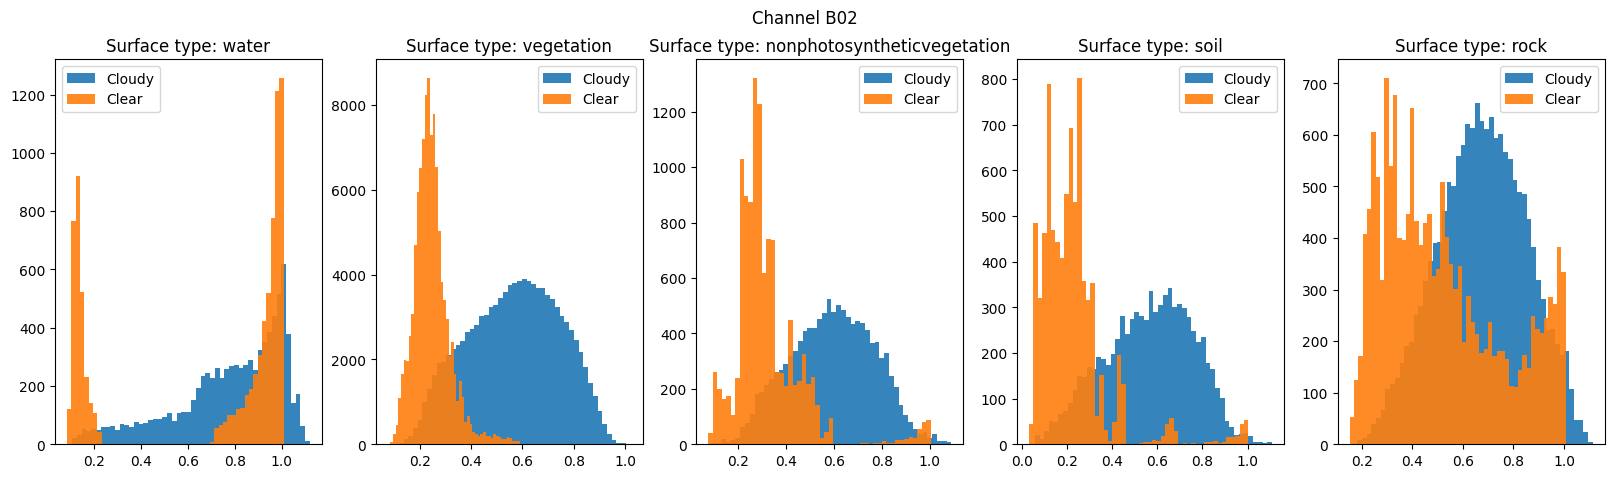

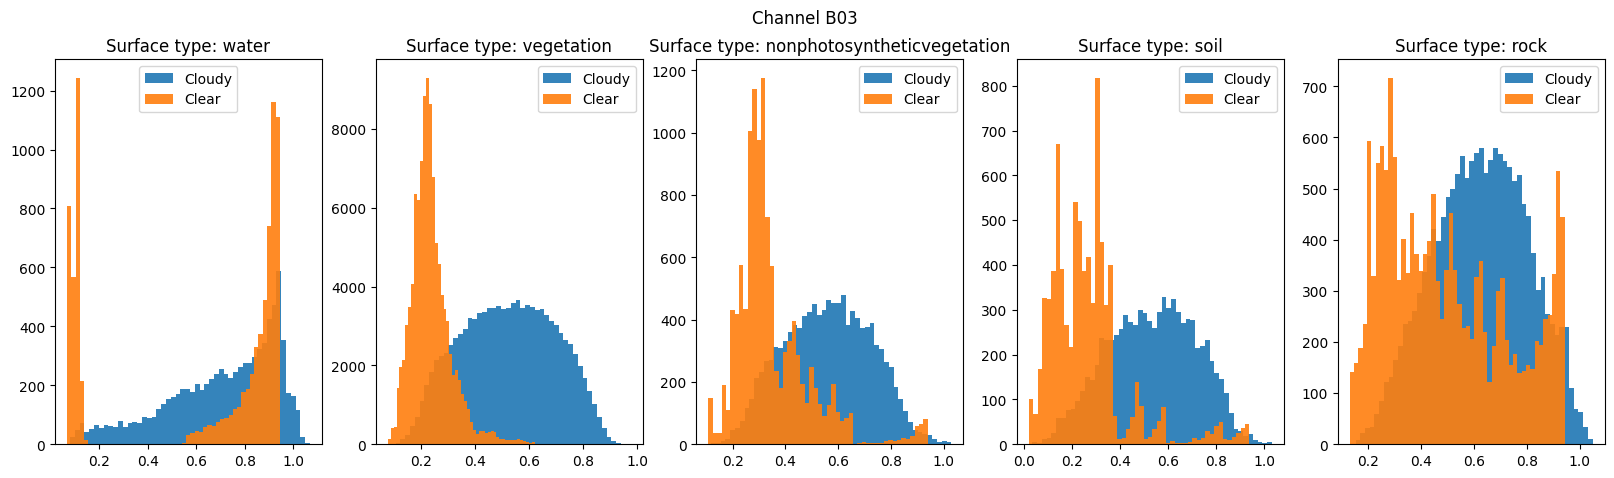

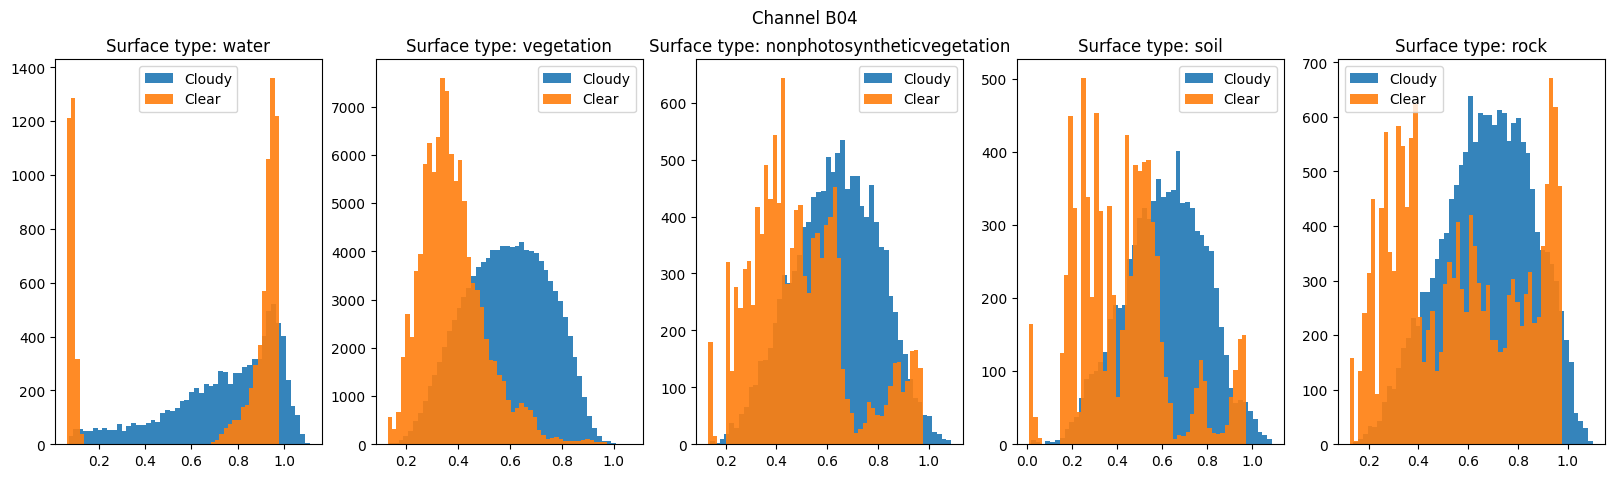

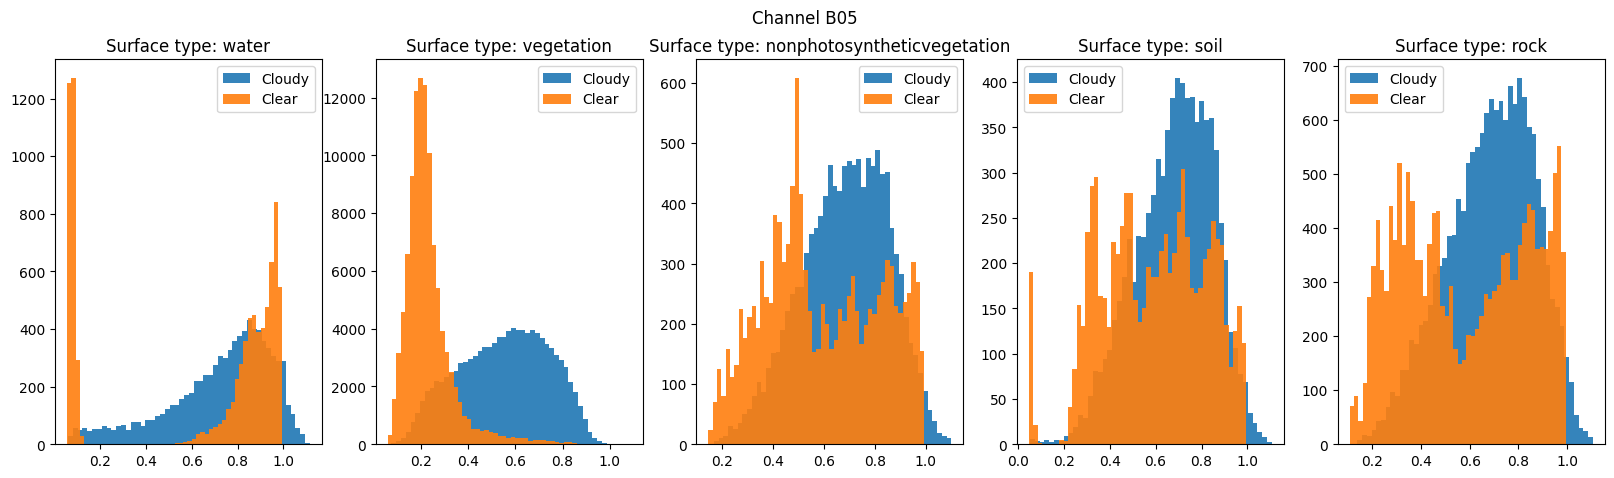

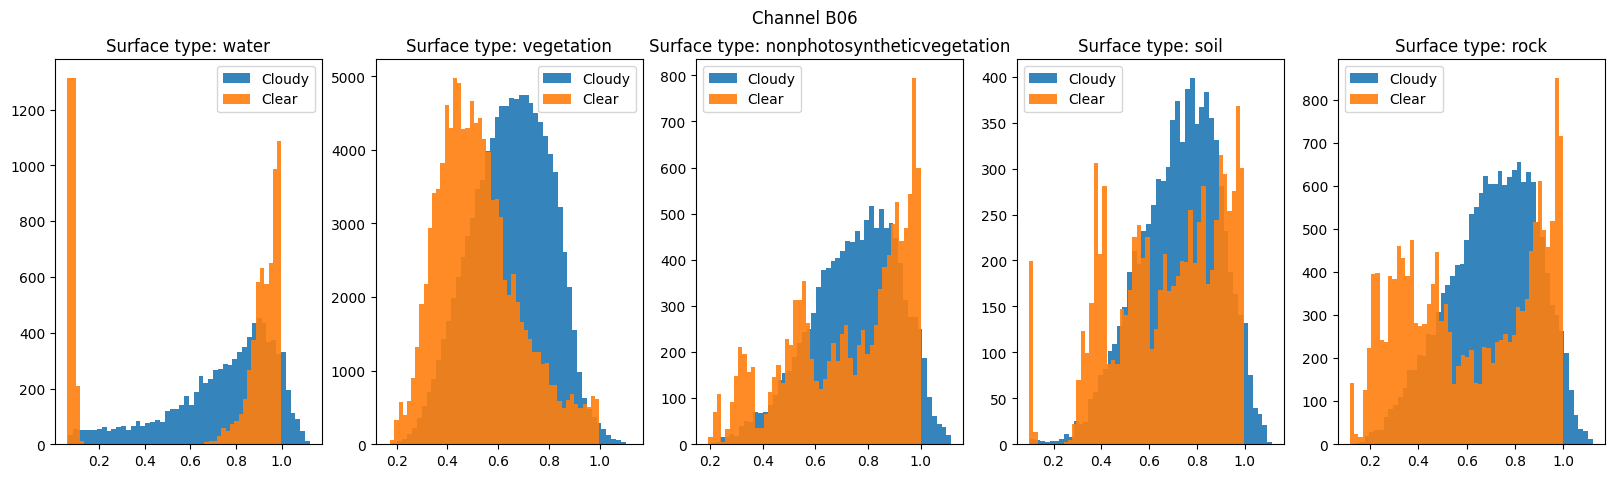

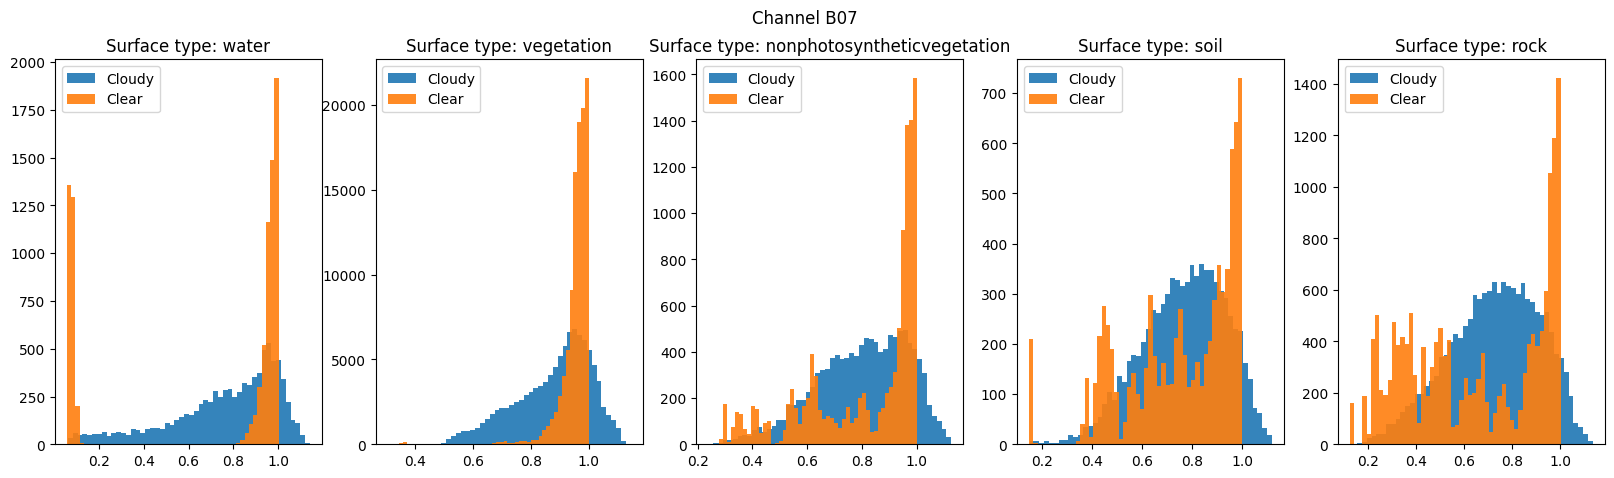

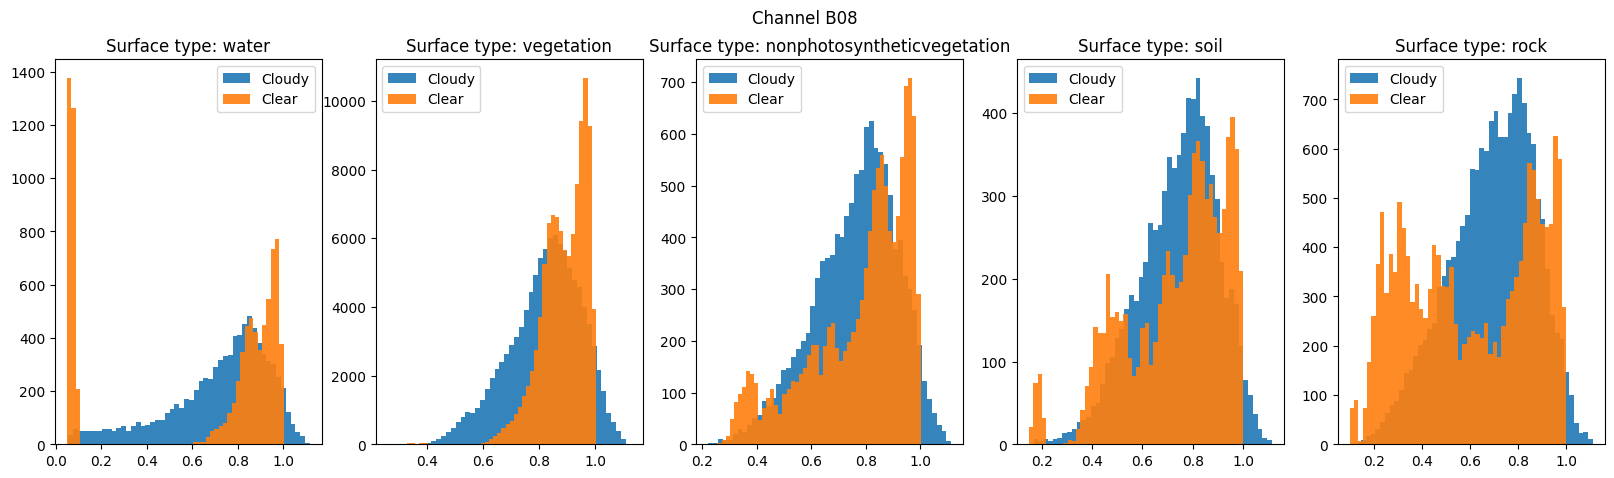

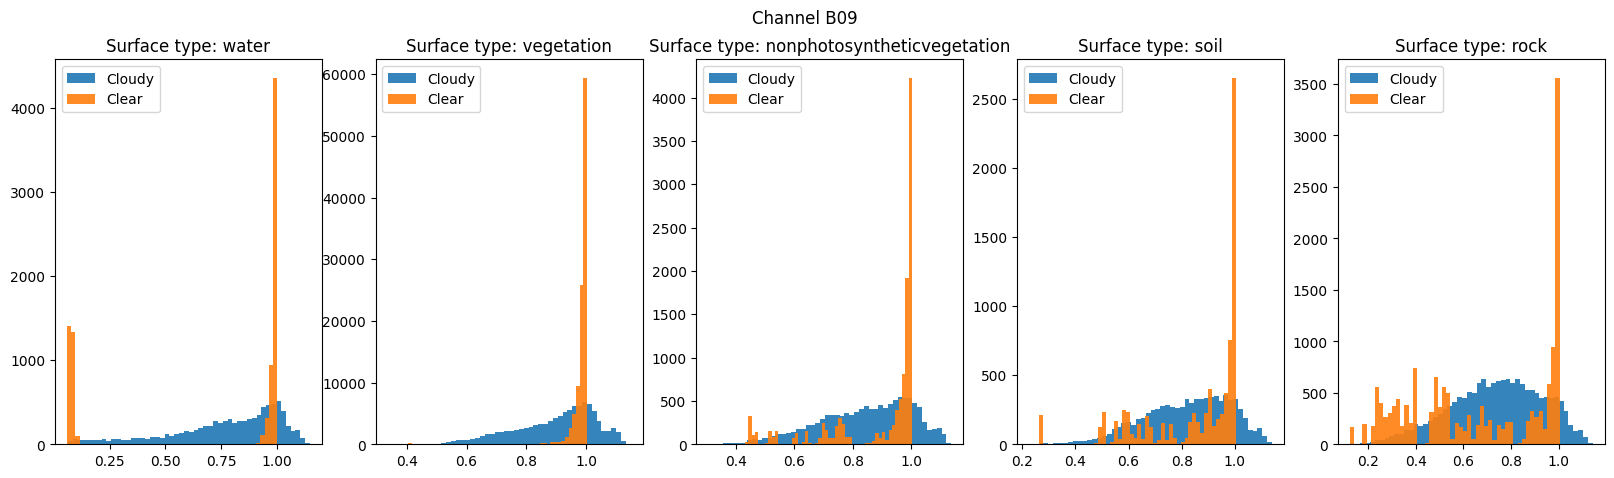

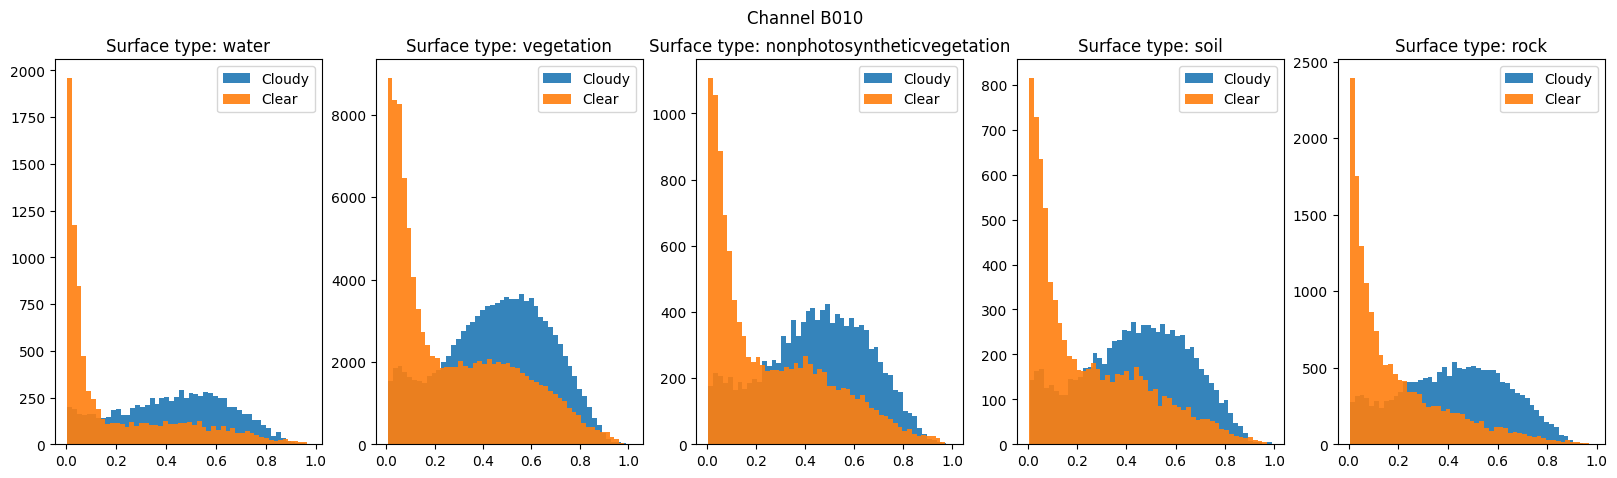

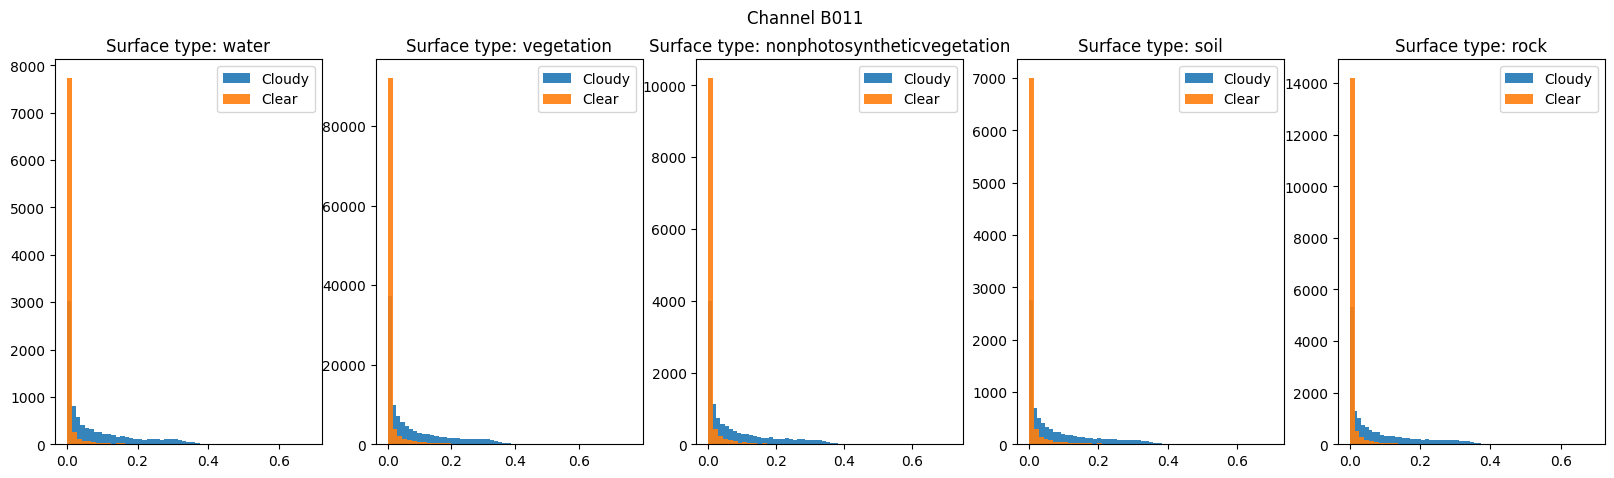

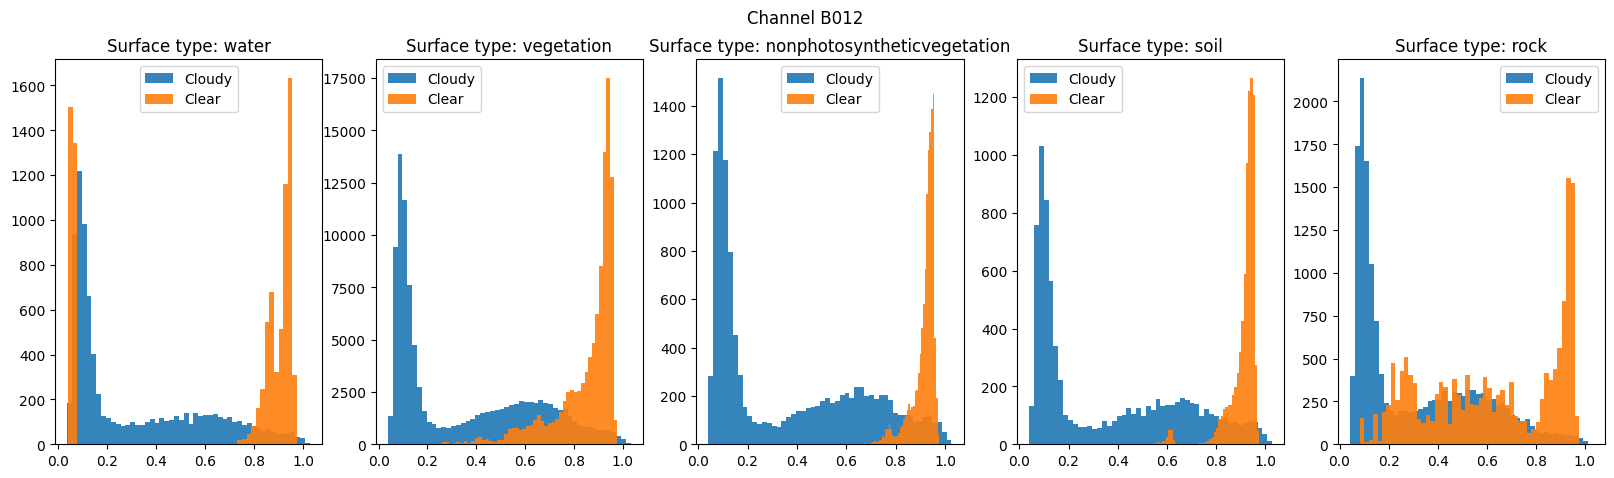

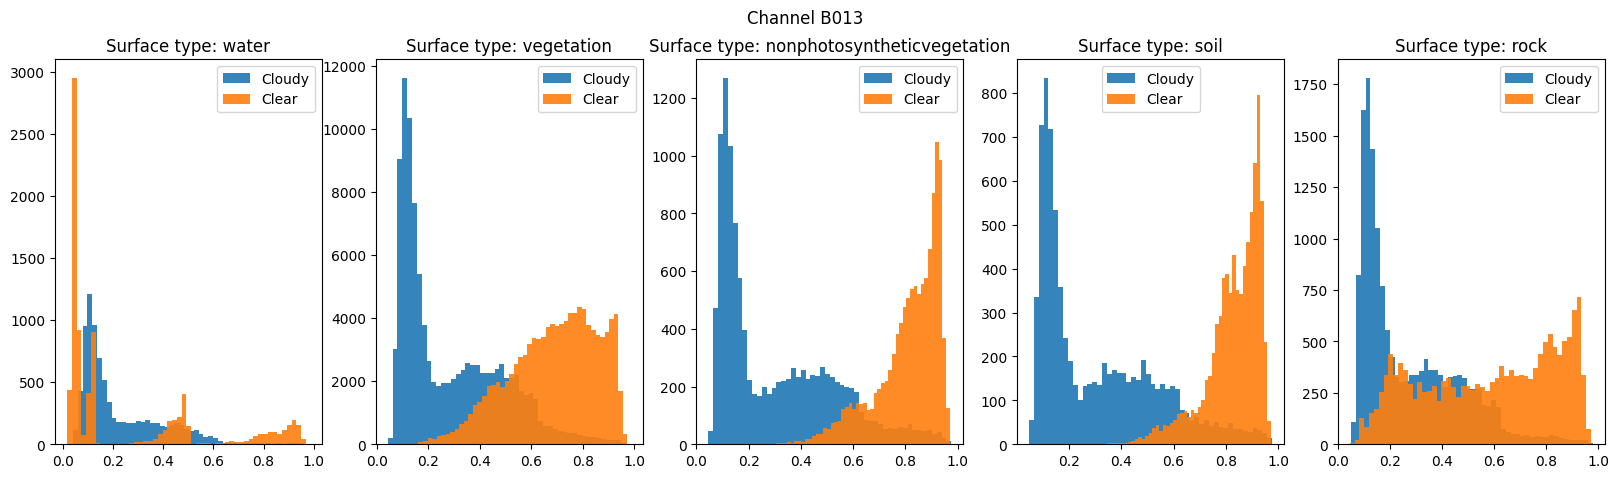

In [25]:
surface_labels=data_all.Surface_Desc_Dumb.unique()
plt.rcParams["figure.figsize"] = [20, 5]
for i in range(2,14):
    fig, axs = plt.subplots(1,len(surface_labels))
    
    if i<=9:
        fig.suptitle("Channel B0"+str(i))
        for j,label in enumerate(surface_labels):
            df_tmp=data_all[data_all['Surface_Desc_Dumb']==label]

            axs[j].hist(df_tmp['Cloud_'+'B0'+str(i)],bins=50,alpha=0.9)
            axs[j].hist(df_tmp['Clear_'+'B0'+str(i)],bins=50,alpha=0.9)
            axs[j].title.set_text('Surface type: '+label)
            axs[j].legend(['Cloudy','Clear'])

    else:
        fig.suptitle("Channel B0"+str(i))
        for j,label in enumerate(surface_labels):
            df_tmp=data_all[data_all['Surface_Desc_Dumb']==label]

            axs[j].hist(df_tmp['Cloud_'+'B'+str(i)],bins=50,alpha=0.9)
            axs[j].hist(df_tmp['Clear_'+'B'+str(i)],bins=50,alpha=0.9)
            axs[j].title.set_text('Surface type: '+label)
            axs[j].legend(['Cloudy','Clear'])

In [26]:
tm=data_all[data_all['Surface_Desc_Dumb']=='vegetation']
tm.Clear_B13.value_counts()

Clear_B13
0.89588    10
0.86000    10
0.92813     9
0.62201     9
0.92477     9
           ..
0.49796     1
0.44223     1
0.56465     1
0.43069     1
0.39338     1
Name: count, Length: 50306, dtype: int64

In [27]:
cloudy_columns=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05',
                'Cloud_B06', 'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10',
                'Cloud_B11', 'Cloud_B12', 'Cloud_B13']

clear_columns=['Clear_B02','Clear_B03', 'Clear_B04', 
               'Clear_B05', 'Clear_B06', 'Clear_B07','Clear_B08', 
               'Clear_B09', 'Clear_B10', 'Clear_B11', 'Clear_B12',
                'Clear_B13']

channel_columns=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05',
                'Cloud_B06', 'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10',
                'Cloud_B11', 'Cloud_B12', 'Cloud_B13',
                'Clear_B02','Clear_B03', 'Clear_B04', 
                'Clear_B05', 'Clear_B06', 'Clear_B07','Clear_B08', 
                'Clear_B09', 'Clear_B10', 'Clear_B11', 'Clear_B12',
                'Clear_B13']

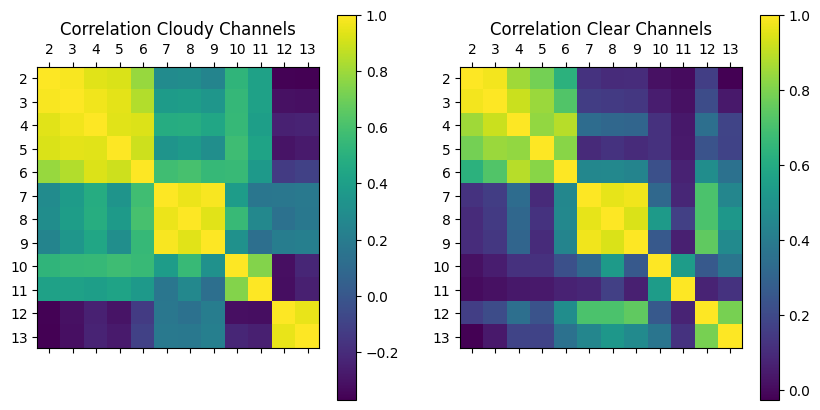

In [28]:
plt.rcParams["figure.figsize"] = [10, 5]
fig, (ax1, ax2) = plt.subplots(1,2)
fig_1=ax1.matshow(data_all[cloudy_columns].corr())
fig_2=ax2.matshow(data_all[clear_columns].corr())
fig.colorbar(fig_1,ax=ax1)
fig.colorbar(fig_2,ax=ax2)

#Set titles
ax1.title.set_text('Correlation Cloudy Channels')
ax2.title.set_text('Correlation Clear Channels')

#Set ticks subplot 1
ax1.set_xticks(range(0,12))
ax1.set_yticks(range(0,12))
ax1.set_xticklabels(range(2,14))
ax1.set_yticklabels(range(2,14))

ax2.set_xticks(range(0,12))
ax2.set_yticks(range(0,12))
ax2.set_xticklabels(range(2,14))
ax2.set_yticklabels(range(2,14))

plt.show()

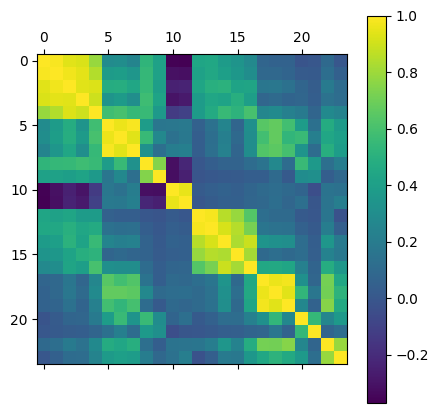

In [29]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.matshow(data_all[channel_columns].corr())
plt.colorbar()

## Eigenvalue decomposition

In [30]:
cloudy_cov=data_all[cloudy_columns].corr()
[U,S,V]=np.linalg.svd(cloudy_cov)

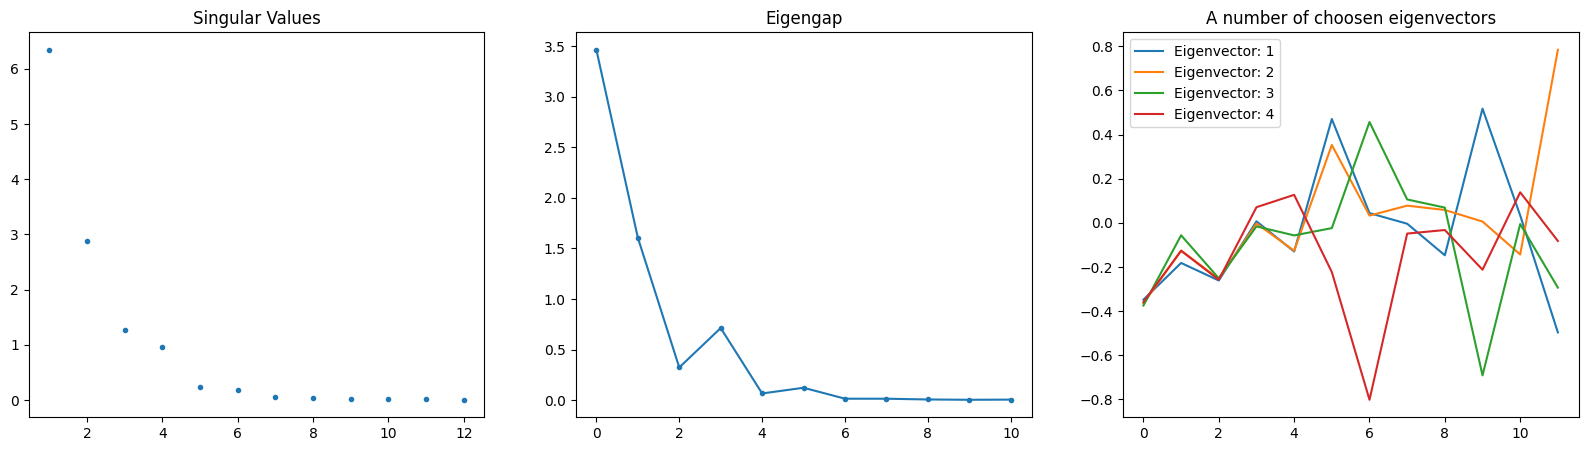

In [31]:
x=[i+1 for i in range(12)]
plt.rcParams["figure.figsize"] = [20, 5]
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.plot(x,S,'.')
ax1.title.set_text('Singular Values')


ax2.plot(S[0:-1]-S[1:],'.-')
ax2.title.set_text('Eigengap')

num_eigenvecs=4
ax3.plot(V[:,0:num_eigenvecs])
ax3.title.set_text('A number of choosen eigenvectors')
ax3.legend(["Eigenvector: "+str(i+1) for i in range(num_eigenvecs)])
plt.show()

### Seems to be a large gap between singular values 4 and 5. Do we then have about 4 independent channels?

## PCA

In [32]:
input_output_variables=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05', 'Cloud_B06',
                        'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10', 'Cloud_B11',
                        'Cloud_B12', 'Cloud_B13', 'Sat_Zenith_Angle',
                        'Sun_Zenith_Angle', 'Azimuth_Diff_Angle',
                        'Clear_B02','Clear_B03','Clear_B04','Clear_B05','Clear_B06',
                        'Clear_B07','Clear_B08','Clear_B09','Clear_B10','Clear_B11',
                        'Clear_B12','Clear_B13']
input_variables=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05', 'Cloud_B06',
                        'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10', 'Cloud_B11',
                        'Cloud_B12', 'Cloud_B13', 'Sat_Zenith_Angle',
                        'Sun_Zenith_Angle', 'Azimuth_Diff_Angle']

variables=input_variables
X=data_all[variables].copy()
co=np.dot(X.T,X)
eigvals,eigvecs=np.linalg.eig(co)
e_indices = np.argsort(eigvals)[::-1]
eigvecs_sort=np.real(eigvecs[:,e_indices])
eigvals_sort=np.real(eigvals[e_indices])

In [33]:
explained_variance=[]
for i in eigvals:
    explained_variance.append((i/sum(eigvals)))

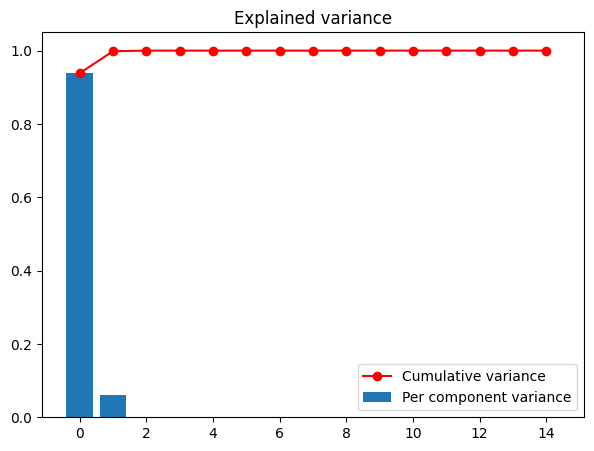

In [34]:
num=len(variables)
plt.rcParams["figure.figsize"] = [7, 5]
plt.bar(range(np.size(explained_variance[0:num])),height=explained_variance[0:num])
plt.plot(np.cumsum(explained_variance),'ro-')
plt.title('Explained variance')
plt.xticks(range(0,len(variables),2))
plt.legend(['Cumulative variance','Per component variance'])
plt.show()

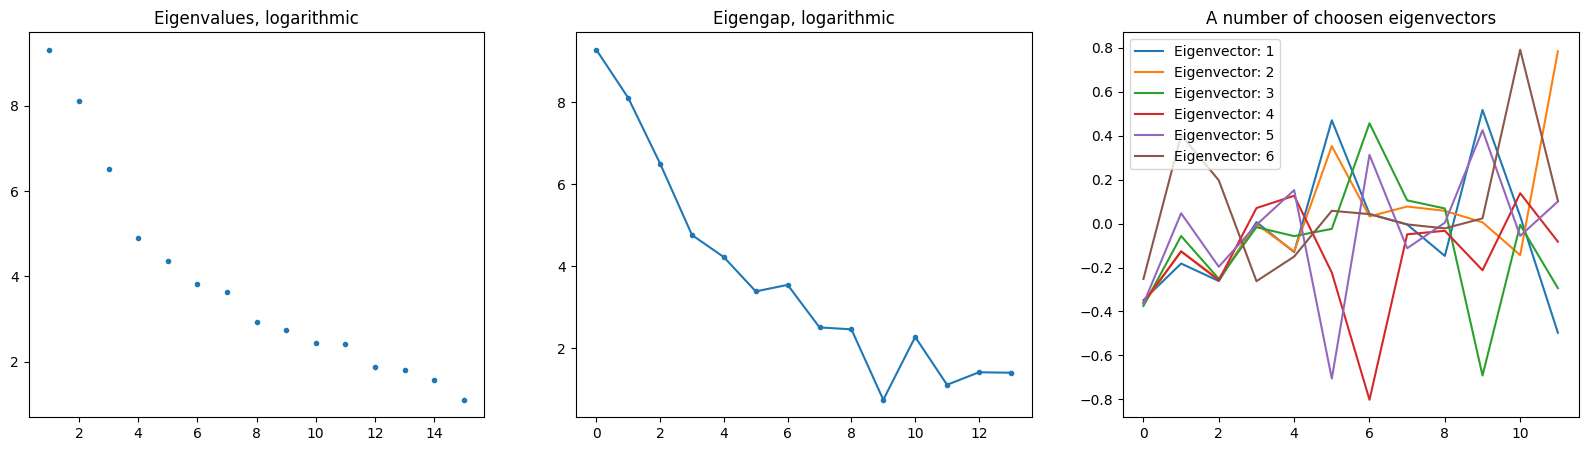

In [35]:
x=[i+1 for i in range(len(eigvals_sort))]
plt.rcParams["figure.figsize"] = [20, 5]
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.plot(x,np.log10(eigvals_sort),'.')
ax1.title.set_text('Eigenvalues, logarithmic')


ax2.plot(np.log10(eigvals_sort[0:-1]-eigvals_sort[1:]),'.-')
ax2.title.set_text('Eigengap, logarithmic')

num_eigenvecs=6
ax3.plot(V[:,0:num_eigenvecs])
ax3.title.set_text('A number of choosen eigenvectors')
ax3.legend(["Eigenvector: "+str(i+1) for i in range(num_eigenvecs)])
plt.show()